# Blast tool for multiple databases macthing sequences

Annotation post-processing tool for visualisation via Venn diagram of the annotations, made via BLAST/Diamond with tabular output, on different databases. The tabular format must provide for the presence of the **qseqid** field, without which it will not be possible to generate the graph.

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted 
from matplotlib_venn import venn2_unweighted 

In [2]:
#Insert the names (or paths) of the tsv files
#Remember that all files must have, in the first row, the columns name (in tsv format) 
#You can add other files in this list!

files = [
    "../cds_nr.tsv",
    "../cds_tr.tsv",
    "../cds_sp.tsv"   
]

title = "Contracaecum osculatum - Blastx"

databases_names =[
    "Nr", 
    "TrEMBL",
    "Swiss-Prot",
]

This is a debug cell, you can go forward

In [26]:
#This is a debug section that you can ignore
for i in files:
    pass
    '''
    f = open(i, "r")
    fl = f.readlines()
    fl[0] = fl[0].replace(" ", "\t")
    
    f.close()
    
    f = open(i, "w")
    
    for x in fl:
        f.write(x)
    f.close()
    print(i, "Done")
    '''

Execute this cell only if there aren't columns names in the first row

In [3]:
#Creating a dictonary list where each dict contains all sequences hits count
sets_list = []

for f in files:
    res = []
    try:
        with open(f, "r") as file:
            for line in file:
                line_data = line.split('\t')[0]
                res.append(line_data)
            file.close()
    except:
        with open("set.txt", "r") as file:
            for line in file:
                line_data = line[:-1]
                res.append(line_data)
            file.close()
    sets_list.append(set(res))     

Execute this cell only if the first line of your tsv is the outformat!

In [6]:
#Creating a dictonary list where each dict contains all sequences hits count
sets_list = []

for f in files:
    #Import the dataset
    df = pd.read_csv(f, sep="\t")
    
    #Drop Nan rows
    df.dropna(inplace=True)
    
    #Create and append the dict
    sets_list.append(set(df['qseqid']) - {'qseqid'})

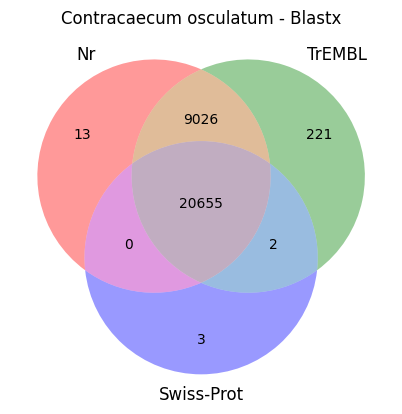

In [4]:
if len(files) == 2:
    venn2_unweighted(sets_list, databases_names)
elif len(files) == 3:
    venn3_unweighted(sets_list, databases_names)
else:
    print("This notebook only supports 2 or 3 dimensional venn diagram")
plt.title(title)
plt.savefig('blastx-venn.png', bbox_inches = 'tight', dpi=350)
plt.show()